In [20]:
import keras

In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv('imdb_10000.csv')

In [22]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9994,"First off, this is the worst movie I've ever s...",negative
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative


In [23]:
x = data.review
y = data.sentiment

In [24]:
len(max(x))

1961

In [25]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9994    negative
9995    positive
9996    negative
9997    negative
9998    negative
Name: sentiment, Length: 9999, dtype: object

In [26]:
#positive = 1 negative = 0
for i in range(0,len(y)):
    if y[i] =='positive':
        y[i] = 1
    else:
        y[i] = 0

In [27]:
#문자 정수화 => 가장 빈번한 단어를 1로 설정
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [28]:
word_to_index = tokenizer.word_index

In [29]:
vocab_size = len(word_to_index)+1
#등장한 모든 단어의 수 (특성으로 사용할 단어의 수)

In [30]:
x = tokenizer.texts_to_sequences(x)

In [31]:
from keras.preprocessing import sequence
x = sequence.pad_sequences(x, maxlen = 1961) 
#가장 긴 문장과 모든 문장의 길이를 통일

In [32]:
x

array([[   0,    0,    0, ...,  123, 3853,  484],
       [   0,    0,    0, ..., 2154,   68,  214],
       [   0,    0,    0, ...,   63,   16,  359],
       ...,
       [   0,    0,    0, ...,   25,   51, 2103],
       [   0,    0,    0, ...,   15,  331,  153],
       [   0,    0,    0, ...,   49,   17,   69]])

In [33]:
y

0       1
1       1
2       1
3       0
4       1
       ..
9994    0
9995    1
9996    0
9997    0
9998    0
Name: sentiment, Length: 9999, dtype: object

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

In [35]:
from keras.models import Sequential
from keras import layers


model = Sequential()
model.add(layers.Embedding(vocab_size, 128, input_length=1961))
#model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.Conv1D(128, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))

model.add(layers.Conv1D(64, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())


model.add(layers.Dense(1))

model.summary()

model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1961, 128)         7687040   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1955, 128)         114816    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 391, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 385, 64)           57408     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,859,329
Trainable params: 7,859,329
Non-trainable params: 0
____________________________________________

In [36]:
y_test

5344    0
7444    0
1731    0
8719    1
4521    1
       ..
9448    1
8284    0
7852    1
1095    0
8871    1
Name: sentiment, Length: 2000, dtype: object

In [37]:
y_train

9253    1
1561    1
1670    1
6086    0
7332    1
       ..
5734    0
5191    0
5390    0
860     1
7270    0
Name: sentiment, Length: 7999, dtype: object

In [38]:
history = model.fit(X_train, y_train,epochs= 15 ,batch_size= 320,validation_split=0.2)

#history = model.fit(X_train, y_train,epochs= 3 ,batch_size= 320,validation_split=0.2)

Train on 6399 samples, validate on 1600 samples
Epoch 1/15
6399/6399 [==============================] - 328s 51ms/step - loss: 1.1994 - acc: 0.4930 - val_loss: 0.7718 - val_acc: 0.5106
Epoch 2/15
6399/6399 [==============================] - 318s 50ms/step - loss: 0.6724 - acc: 0.5967 - val_loss: 0.6875 - val_acc: 0.5569
Epoch 3/15
6399/6399 [==============================] - 287s 45ms/step - loss: 0.6087 - acc: 0.8215 - val_loss: 0.6766 - val_acc: 0.5944
Epoch 4/15
6399/6399 [==============================] - 147s 23ms/step - loss: 0.5565 - acc: 0.9258 - val_loss: 0.6643 - val_acc: 0.6381
Epoch 5/15
6399/6399 [==============================] - 151s 24ms/step - loss: 0.5093 - acc: 0.9562 - val_loss: 0.6521 - val_acc: 0.6675
Epoch 6/15
6399/6399 [==============================] - 150s 23ms/step - loss: 0.4629 - acc: 0.9680 - val_loss: 0.6369 - val_acc: 0.6781
Epoch 7/15
6399/6399 [==============================] - 150s 23ms/step - loss: 0.4137 - acc: 0.9737 - val_loss: 0.6188 - val_acc: 

In [39]:
import matplotlib.pyplot as plt

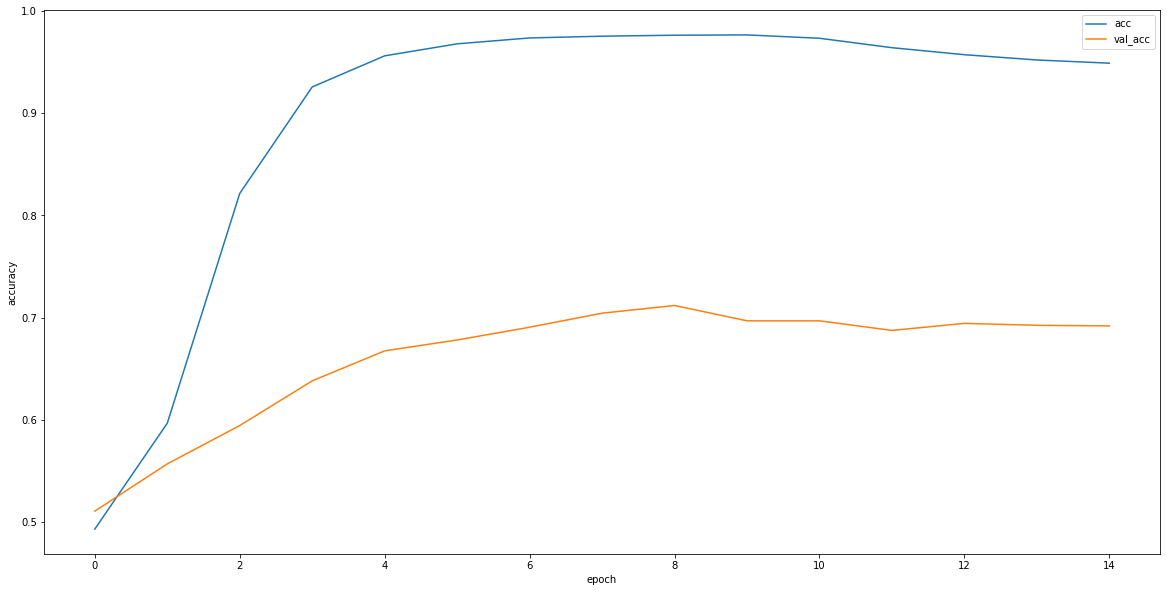

In [40]:
plt.figure(figsize=(20,10))
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")

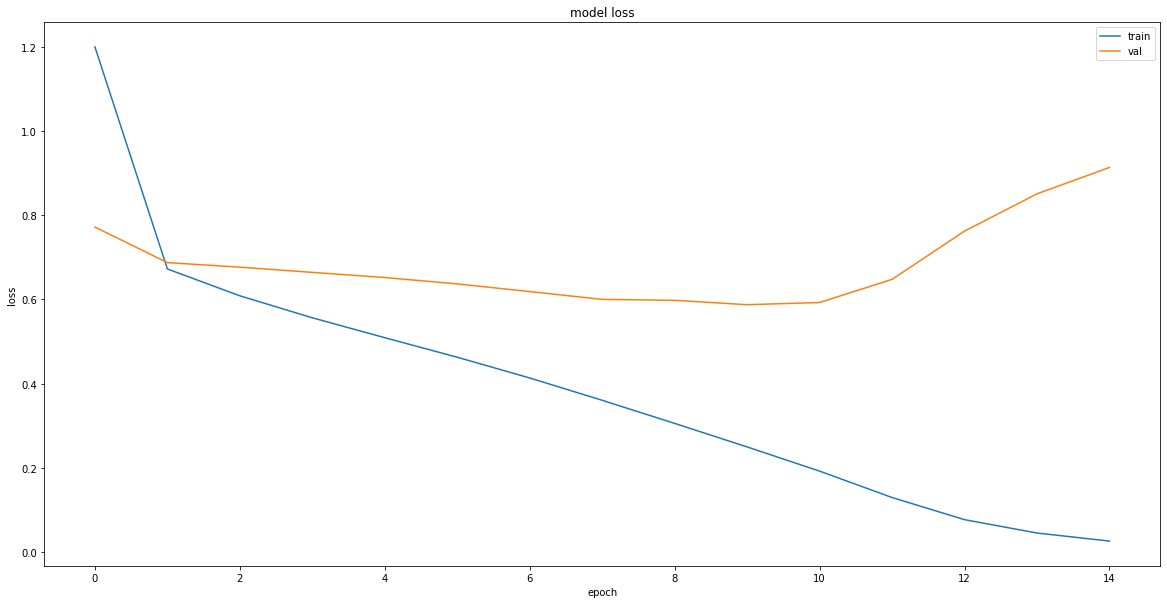

In [41]:
import matplotlib.pyplot as plt
#epochs = range(len(history.history['loss']))
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper right')

plt.show()

In [42]:
test_acc, test_loss = model.evaluate(X_test, y_test)

2000/2000 [==============================] - 14s 7ms/step


In [43]:
test_acc,test_loss

(0.8958537635803223, 0.6970000267028809)

In [44]:
X_test

array([[    0,     0,     0, ...,     3,   393,   153],
       [    0,     0,     0, ...,    11,    27,   826],
       [    0,     0,     0, ...,   831,    33,  1263],
       ...,
       [    0,     0,     0, ...,     7, 54622, 54623],
       [    0,     0,     0, ...,  1264,   123,   421],
       [    0,     0,     0, ...,     2,    49,  7186]])

In [45]:
X_train

array([[    0,     0,     0, ...,  1006,     7,     7],
       [    0,     0,     0, ...,    52,  1374,   394],
       [    0,     0,     0, ...,   501,    10,   121],
       ...,
       [    0,     0,     0, ...,    42,     4,   153],
       [    0,     0,     0, ...,   123,  5219, 13123],
       [    0,     0,     0, ...,    51,    58, 20770]])